# Problem Statement

A Company wants to automate the loan eligibility process 
based on customer details provided while filling online 
application form. The details filled by the customer are 
Gender, Marital Status, Education, Number of Dependents, 
Income of self and co applicant, Required Loan Amount, 
Required Loan Term, Credit History and others. The 
requirements are as follows:


# 1.)Check eligibility of the Customer given the inputs described above.(Classification)

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

# Read Dataset

In [2]:
trd = pd.read_csv(r"C:\Users\Aishwarya\OneDrive\Desktop\PROJECTS\Loan Project\training_set (1).csv")
tsd = pd.read_csv(r"C:\Users\Aishwarya\OneDrive\Desktop\PROJECTS\Loan Project\testing_set (1).csv")

# Profile

In [3]:
tsd.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
trd.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


# Missing Data Treatment

In [5]:
trd.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
tsd.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
for i in tsd.columns:                                   # filling Null values with their mean and mode
    if(trd[i].dtypes == "object"):
        x = trd[i].mode()[0]
        trd[i] = trd[i].fillna(x)
        tsd[i] = tsd[i].fillna(x)
    else:
        x = trd[i].mean()
        trd[i] = trd[i].fillna(x)
        tsd[i] = tsd[i].fillna(x)    

# Define X and Y

In [8]:
Y= trd[["Loan_Status"]]
X=trd.drop(labels=["Loan_Status","Loan_ID"],axis=1)
Xb=tsd.drop(labels=["Loan_ID"],axis=1)

#### Labelencoding Y since it is a classification problem

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Ynew = pd.DataFrame(le.fit_transform(Y.Loan_Status),columns=["Loan_Status"])

# Cat Con

In [10]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [11]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [12]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

### Use minmax scaler for neural networks,also for B data use only transform of minmaxscaler 

In [13]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X1 = pd.DataFrame(mm.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

X1b = pd.DataFrame(mm.transform(Xb[con]),columns=con)
X2b = pd.get_dummies(Xb[cat])
Xnewb = X1b.join(X2b)

# Splitting

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Ynew,test_size=0.2,random_state=21)

# Neural Network

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

# This is a classification problem ,so use loss as binary_crossentropy

In [16]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1,activation="sigmoid"))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="binary_crossentropy",metrics="accuracy")
model = nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
16/16 [==============================] - 2s 22ms/step - loss: 0.6480 - accuracy: 0.7067 - val_loss: 0.5780 - val_accuracy: 0.7317
Epoch 2/250
16/16 [==============================] - 0s 5ms/step - loss: 0.5334 - accuracy: 0.7658 - val_loss: 0.5710 - val_accuracy: 0.6992
Epoch 3/250
16/16 [==============================] - 0s 5ms/step - loss: 0.5238 - accuracy: 0.7576 - val_loss: 0.5174 - val_accuracy: 0.7967
Epoch 4/250
16/16 [==============================] - 0s 5ms/step - loss: 0.5253 - accuracy: 0.7882 - val_loss: 0.5352 - val_accuracy: 0.7642
Epoch 5/250
16/16 [==============================] - 0s 5ms/step - loss: 0.5093 - accuracy: 0.7800 - val_loss: 0.5245 - val_accuracy: 0.8211
Epoch 6/250
16/16 [==============================] - 0s 5ms/step - loss: 0.4937 - accuracy: 0.7862 - val_loss: 0.4978 - val_accuracy: 0.8130
Epoch 7/250
16/16 [==============================] - 0s 5ms/step - loss: 0.4945 - accuracy: 0.7984 - val_loss: 0.4940 - val_accuracy: 0.7967
Epoch 8/250


In [17]:
tr = model.history['accuracy']
ts = model.history['val_accuracy']

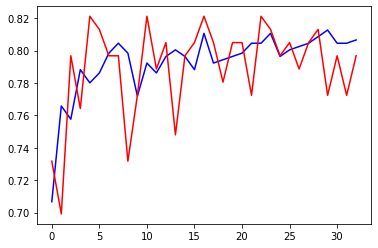

In [18]:
plt.plot(tr,c="blue")    #plotting results
plt.plot(ts,c="red")

# Training using Entire data

In [19]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1,activation="sigmoid"))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="binary_crossentropy",metrics="accuracy")
model = nn.fit(Xnew,Ynew,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
20/20 [==============================] - 1s 13ms/step - loss: 0.6342 - accuracy: 0.6987 - val_loss: 0.5256 - val_accuracy: 0.7642
Epoch 2/250
20/20 [==============================] - 0s 5ms/step - loss: 0.5430 - accuracy: 0.7590 - val_loss: 0.6065 - val_accuracy: 0.6748
Epoch 3/250
20/20 [==============================] - 0s 4ms/step - loss: 0.5135 - accuracy: 0.7866 - val_loss: 0.4798 - val_accuracy: 0.8293
Epoch 4/250
20/20 [==============================] - 0s 4ms/step - loss: 0.5114 - accuracy: 0.7915 - val_loss: 0.5340 - val_accuracy: 0.7317
Epoch 5/250
20/20 [==============================] - 0s 5ms/step - loss: 0.4984 - accuracy: 0.7850 - val_loss: 0.5203 - val_accuracy: 0.7967
Epoch 6/250
20/20 [==============================] - 0s 4ms/step - loss: 0.4970 - accuracy: 0.8046 - val_loss: 0.7064 - val_accuracy: 0.5285
Epoch 7/250
20/20 [==============================] - 0s 5ms/step - loss: 0.5105 - accuracy: 0.7557 - val_loss: 0.4750 - val_accuracy: 0.7967
Epoch 8/250


In [20]:
tr = model.history['accuracy']
ts = model.history['val_accuracy']

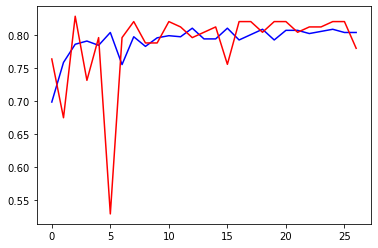

In [21]:
plt.plot(tr,c="blue")
plt.plot(ts,c="red")

# Final Prediction

In [22]:
final_DF = Xnewb[Xnew.columns]
pred = nn.predict(final_DF)

12/12 [==============================] - 0s 2ms/step


In [23]:
pred

array([[0.7213721 ],
       [0.63278073],
       [0.6463877 ],
       [0.5680462 ],
       [0.55637985],
       [0.6442964 ],
       [0.6549961 ],
       [0.06584926],
       [0.67837536],
       [0.67921937],
       [0.55358595],
       [0.75723845],
       [0.5726122 ],
       [0.22137341],
       [0.8048258 ],
       [0.57723   ],
       [0.64139694],
       [0.7819589 ],
       [0.6399106 ],
       [0.8110689 ],
       [0.5323703 ],
       [0.58595514],
       [0.66558415],
       [0.5754901 ],
       [0.6618026 ],
       [0.05456494],
       [0.5676591 ],
       [0.66899645],
       [0.76810306],
       [0.697497  ],
       [0.7265938 ],
       [0.65578514],
       [0.7729664 ],
       [0.69719845],
       [0.71439445],
       [0.20822918],
       [0.69024605],
       [0.75956476],
       [0.71755725],
       [0.6463782 ],
       [0.71897435],
       [0.69008374],
       [0.74254245],
       [0.7614062 ],
       [0.69521743],
       [0.59762436],
       [0.5941216 ],
       [0.685

In [24]:
Q=[]
for i in pred:
    Q.append(int(i[0]))

In [25]:
w1 = []
for i in pred:
    if(i<0.5):
        w1.append("N")
    else:
        w1.append("Y")

In [26]:
tsd["Loan_Status"]=w1

In [27]:
tsd

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.000000,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.000000,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.000000,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.842199,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.000000,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.000000,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.000000,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0.842199,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.000000,Rural,Y


# 2.If customer is not eligible for the input required amount and duration, what can be amount for the given duration.(Regression)

In [28]:
Xb=tsd[(tsd.Loan_Status=="N")]

In [29]:
Xb.shape

(75, 13)

In [31]:
Xb.index=range(0,75)

In [32]:
N_cust=Xb

In [33]:
Xb=Xb.drop(labels=["Loan_ID"],axis=1)

# X and Y

In [34]:
Y= trd["LoanAmount"]
X=trd.drop(labels=["LoanAmount","Loan_Status","Loan_ID"],axis=1)
Xb=Xb.drop(labels=["LoanAmount","Loan_Status"],axis=1)

# Cat Con

In [35]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

# Preprocessing

In [36]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X1 = pd.DataFrame(mm.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

X1b = pd.DataFrame(mm.transform(Xb[con]),columns=con)
X2b = pd.get_dummies(Xb[cat])
Xnewb = X1b.join(X2b)

# Splitting

In [37]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Neural Network

In [38]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="mse")
model = nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
16/16 [==============================] - 1s 13ms/step - loss: 19954.6953 - val_loss: 14602.5723
Epoch 2/250
16/16 [==============================] - 0s 5ms/step - loss: 6908.2241 - val_loss: 9180.0449
Epoch 3/250
16/16 [==============================] - 0s 5ms/step - loss: 6041.2490 - val_loss: 9311.5117
Epoch 4/250
16/16 [==============================] - 0s 5ms/step - loss: 6015.3384 - val_loss: 9165.0215
Epoch 5/250
16/16 [==============================] - 0s 5ms/step - loss: 5968.1426 - val_loss: 9698.8301
Epoch 6/250
16/16 [==============================] - 0s 5ms/step - loss: 5833.6953 - val_loss: 9455.2012
Epoch 7/250
16/16 [==============================] - 0s 4ms/step - loss: 5849.5347 - val_loss: 9314.1582
Epoch 8/250
16/16 [==============================] - 0s 5ms/step - loss: 5601.9707 - val_loss: 9794.0898
Epoch 9/250
16/16 [==============================] - 0s 5ms/step - loss: 5587.2046 - val_loss: 9246.5889
Epoch 10/250
16/16 [==============================] 

In [41]:
tr_err = model.history['loss']
ts_err = model.history['val_loss']

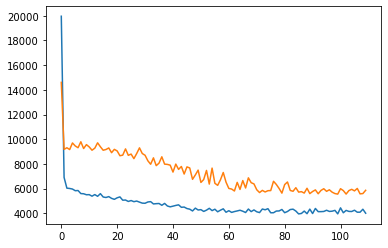

In [42]:
import matplotlib.pyplot as plt    #plot results
plt.plot(tr_err)
plt.plot(ts_err)

# Training using entire data

In [43]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="mse")
model = nn.fit(Xnew,Y,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
20/20 [==============================] - 1s 9ms/step - loss: 13649.7559 - val_loss: 9518.5762
Epoch 2/250
20/20 [==============================] - 0s 4ms/step - loss: 6921.4902 - val_loss: 12591.8291
Epoch 3/250
20/20 [==============================] - 0s 4ms/step - loss: 6988.0278 - val_loss: 10099.5527
Epoch 4/250
20/20 [==============================] - 0s 3ms/step - loss: 6722.5859 - val_loss: 9009.5850
Epoch 5/250
20/20 [==============================] - 0s 4ms/step - loss: 6694.6665 - val_loss: 10603.2314
Epoch 6/250
20/20 [==============================] - 0s 4ms/step - loss: 6528.4502 - val_loss: 9591.8926
Epoch 7/250
20/20 [==============================] - 0s 3ms/step - loss: 6417.2217 - val_loss: 9039.0146
Epoch 8/250
20/20 [==============================] - 0s 3ms/step - loss: 6049.3735 - val_loss: 8427.2900
Epoch 9/250
20/20 [==============================] - 0s 3ms/step - loss: 6200.7939 - val_loss: 9488.8779
Epoch 10/250
20/20 [==============================]

In [44]:
final_DF = Xnewb[Xnew.columns]
pred = nn.predict(final_DF)
pred

3/3 [==============================] - 0s 2ms/step


array([[135.98883 ],
       [216.60759 ],
       [265.8097  ],
       [117.07079 ],
       [110.55222 ],
       [161.01212 ],
       [108.528465],
       [135.81032 ],
       [145.62242 ],
       [175.17433 ],
       [181.71594 ],
       [151.48103 ],
       [132.7705  ],
       [180.64815 ],
       [138.58023 ],
       [114.55453 ],
       [159.96742 ],
       [110.463356],
       [156.76    ],
       [158.50835 ],
       [171.4066  ],
       [138.50253 ],
       [129.17587 ],
       [180.53154 ],
       [159.30014 ],
       [142.14317 ],
       [115.68445 ],
       [130.09692 ],
       [ 91.33076 ],
       [ 99.76928 ],
       [171.06023 ],
       [139.79674 ],
       [112.528275],
       [132.28276 ],
       [156.12639 ],
       [164.08946 ],
       [165.33513 ],
       [146.28448 ],
       [127.769325],
       [150.87929 ],
       [146.00209 ],
       [164.72069 ],
       [126.548775],
       [136.04166 ],
       [252.47432 ],
       [159.78018 ],
       [151.4232  ],
       [145.8

In [45]:
N_cust["Loan_Amount"]=pred
N_cust

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount
0,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.000000,Rural,N,135.988831
1,LP001094,Male,Yes,2,Graduate,No,12173,0,166.0,360.0,0.000000,Semiurban,N,216.607590
2,LP001153,Male,No,0,Graduate,No,0,24000,148.0,360.0,0.000000,Rural,N,265.809692
3,LP001203,Male,No,0,Graduate,No,3150,0,176.0,360.0,0.000000,Semiurban,N,117.070793
4,LP001313,Male,No,0,Graduate,No,2750,0,130.0,360.0,0.000000,Urban,N,110.552223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,LP002858,Female,No,0,Graduate,No,4333,2333,162.0,360.0,0.000000,Rural,N,131.129684
71,LP002879,Male,Yes,0,Graduate,No,3391,1966,133.0,360.0,0.000000,Rural,N,159.649689
72,LP002901,Male,No,0,Graduate,No,2283,15000,106.0,360.0,0.842199,Rural,N,217.804169
73,LP002921,Male,Yes,3+,Not Graduate,No,5316,187,158.0,180.0,0.000000,Semiurban,N,150.223343


# 3. if duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?(Regression)

~~~
1.create a regression model from old data to predict duration. 
2.choose all the Loan status with "N " and duration <20 years from predicted data.
3.predict the loan duration for chosen customers 
~~~

In [46]:
tsd[((tsd.Loan_Amount_Term<=240) & (tsd.Loan_Status =="N"))]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
84,LP001450,Male,Yes,0,Graduate,No,4456,0,131.0,180.0,0.000000,Semiurban,N
164,LP001921,Male,No,1,Graduate,No,3180,2370,80.0,240.0,0.842199,Rural,N
173,LP001979,Male,No,0,Graduate,No,3017,2845,159.0,180.0,0.000000,Urban,N
245,LP002355,Male,Yes,0,Graduate,No,3186,3145,150.0,180.0,0.000000,Semiurban,N
325,LP002802,Male,No,0,Graduate,No,2875,2416,95.0,6.0,0.000000,Semiurban,N
354,LP002921,Male,Yes,3+,Not Graduate,No,5316,187,158.0,180.0,0.000000,Semiurban,N


# X and Y

In [47]:
Y= trd["Loan_Amount_Term"]
X=trd.drop(labels=["Loan_Amount_Term","Loan_Status","Loan_ID"],axis=1)

Xb=tsd[((tsd.Loan_Amount_Term<=240) & (tsd.Loan_Status =="N"))]

In [48]:
Xb.shape

(6, 13)

In [50]:
Xb.index=range(0,6)

In [51]:
D_cust=Xb
Xb=Xb.drop(labels=["Loan_Amount_Term","Loan_ID","Loan_Status"],axis=1)

In [52]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

# Preprocessing

In [53]:
mm = MinMaxScaler()
X1 = pd.DataFrame(mm.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

X1b = pd.DataFrame(mm.transform(Xb[con]),columns=con)
X2b = pd.get_dummies(Xb[cat])
Xnewb = X1b.join(X2b)

# Splitting

In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Neural Networks

In [55]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="mse")
model = nn.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
16/16 [==============================] - 1s 11ms/step - loss: 103003.1953 - val_loss: 69543.1172
Epoch 2/250
16/16 [==============================] - 0s 4ms/step - loss: 33365.4609 - val_loss: 7321.9473
Epoch 3/250
16/16 [==============================] - 0s 4ms/step - loss: 5711.3340 - val_loss: 4071.1206
Epoch 4/250
16/16 [==============================] - 0s 4ms/step - loss: 5318.1533 - val_loss: 4011.8411
Epoch 5/250
16/16 [==============================] - 0s 4ms/step - loss: 5342.8599 - val_loss: 3755.7471
Epoch 6/250
16/16 [==============================] - 0s 4ms/step - loss: 5092.1597 - val_loss: 3830.9182
Epoch 7/250
16/16 [==============================] - 0s 4ms/step - loss: 4996.2729 - val_loss: 3697.0601
Epoch 8/250
16/16 [==============================] - 0s 4ms/step - loss: 5045.7588 - val_loss: 3807.3313
Epoch 9/250
16/16 [==============================] - 0s 4ms/step - loss: 4944.6240 - val_loss: 3652.1860
Epoch 10/250
16/16 [==============================

In [57]:
tr_err = model.history['loss']
ts_err = model.history['val_loss']

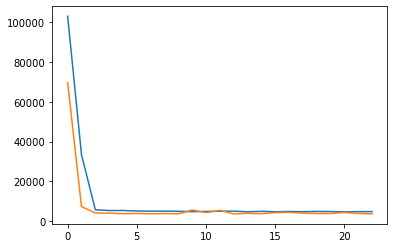

In [58]:
plt.plot(tr_err)
plt.plot(ts_err)

# Training using entire data

In [59]:
nn = Sequential()
nn.add(Dense(100,input_dim=len(xtrain.columns)))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(100))
nn.add(Dropout(0.1))
nn.add(Dense(1))

from keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10)
nn.compile(loss="mse")
model = nn.fit(Xnew,Y,validation_data=(xtest,ytest),epochs=250,callbacks=es)

Epoch 1/250
20/20 [==============================] - 1s 8ms/step - loss: 96926.3047 - val_loss: 52372.8281
Epoch 2/250
20/20 [==============================] - 0s 3ms/step - loss: 19647.2012 - val_loss: 4320.5327
Epoch 3/250
20/20 [==============================] - 0s 3ms/step - loss: 5369.4272 - val_loss: 4116.3315
Epoch 4/250
20/20 [==============================] - 0s 3ms/step - loss: 5044.8042 - val_loss: 4089.3740
Epoch 5/250
20/20 [==============================] - 0s 3ms/step - loss: 4969.4478 - val_loss: 3967.9150
Epoch 6/250
20/20 [==============================] - 0s 3ms/step - loss: 4826.9395 - val_loss: 5120.8628
Epoch 7/250
20/20 [==============================] - 0s 3ms/step - loss: 4915.2017 - val_loss: 3747.8130
Epoch 8/250
20/20 [==============================] - 0s 3ms/step - loss: 4544.1943 - val_loss: 3528.2693
Epoch 9/250
20/20 [==============================] - 0s 3ms/step - loss: 4718.0938 - val_loss: 4460.1040
Epoch 10/250
20/20 [==============================] 

In [60]:
Xnew.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [63]:
Xnewb[Xnewb.columns]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.053259,0.000000,0.176556,0.000000,1,0,1,1,0,0,1,0,1,0,1,0
1,0.037477,0.056880,0.102750,0.842199,1,1,0,0,1,0,1,0,1,1,0,0
2,0.035461,0.068279,0.217077,0.000000,1,1,0,1,0,0,1,0,1,0,0,1
3,0.037551,0.075479,0.204052,0.000000,1,0,1,1,0,0,1,0,1,0,1,0
4,0.033704,0.057984,0.124457,0.000000,1,1,0,1,0,0,1,0,1,0,1,0
5,0.063896,0.004488,0.215630,0.000000,1,0,1,0,0,1,0,1,1,0,1,0


In [64]:
Q=['Gender_Female', 'Dependents_1', 'Dependents_2', 'Self_Employed_Yes', 'Property_Area_Rural']
for i in Q:
    Xnewb[i]=0

In [65]:
final_DF = Xnewb[Xnew.columns]

In [66]:
pred = nn.predict(final_DF)

1/1 [==============================] - 0s 60ms/step


In [67]:
pred

array([[334.47934],
       [252.72594],
       [333.76828],
       [334.65338],
       [342.9545 ],
       [306.307  ]], dtype=float32)

In [68]:
D_cust["Loan_new_term"]=pred

In [69]:
D_cust   # Final prediction

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_new_term
0,LP001450,Male,Yes,0,Graduate,No,4456,0,131.0,180.0,0.000000,Semiurban,N,334.479340
1,LP001921,Male,No,1,Graduate,No,3180,2370,80.0,240.0,0.842199,Rural,N,252.725937
2,LP001979,Male,No,0,Graduate,No,3017,2845,159.0,180.0,0.000000,Urban,N,333.768280
3,LP002355,Male,Yes,0,Graduate,No,3186,3145,150.0,180.0,0.000000,Semiurban,N,334.653381
4,LP002802,Male,No,0,Graduate,No,2875,2416,95.0,6.0,0.000000,Semiurban,N,342.954498
5,LP002921,Male,Yes,3+,Not Graduate,No,5316,187,158.0,180.0,0.000000,Semiurban,N,306.307007
